In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import shapiro
from scipy.stats import spearmanr,kendalltau,pearsonr
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency


In [2]:
House_Rent=pd.read_csv("Cleaned_House_Rent.csv")

House_Rent

Unnamed: 0   Posted On  BHK(Bathroom, hall & Kitchen)   Rent  Size  \
0              0  2022-05-18                              2  10000  1100   
1              1  2022-05-13                              2  20000   800   
2              2  2022-05-16                              2  17000  1000   
3              3  2022-07-04                              2  10000   800   
4              4  2022-05-09                              2   7500   850   
...          ...         ...                            ...    ...   ...   
4737        4737  2022-05-18                              2  15000  1000   
4738        4738  2022-05-15                              3  29000  2000   
4739        4739  2022-07-10                              3  35000  1750   
4740        4740  2022-07-06                              3  45000  1500   
4741        4741  2022-05-04                              2  15000  1000   

        Area Type             Area Locality       City Furnishing Status  \
0      Super Area                    Bandel    Kolkata       Unfurnished   
1      Super Area  Phool Bagan, Kankurgachi    Kolkata    Semi-Furnished   
2      Super Area   Salt Lake City Sector 2    Kolkata    Semi-Furnished   
3      Super Area               Dumdum Park    Kolkata       Unfurnished   
4     Carpet Area             South Dum Dum    Kolkata       Unfurnished   
...           ...                       ...        ...               ...   
4737  Carpet Area              Bandam Kommu  Hyderabad    Semi-Furnished   
4738   Super Area      Manikonda, Hyderabad  Hyderabad    Semi-Furnished   
4739  Carpet Area      Himayath Nagar, NH 7  Hyderabad    Semi-Furnished   
4740  Carpet Area                Gachibowli  Hyderabad    Semi-Furnished   
4741  Carpet Area           Suchitra Circle  Hyderabad       Unfurnished   

      Tenant Preferred  Bathroom Point of Contact House_Floor  Floor_Number  
0     Bachelors/Family         2    Contact Owner      Ground             2  
1     Bachelors/Family         1    Contact Owner           1             3  
2     Bachelors/Family         1    Contact Owner           1             3  
3     Bachelors/Family         1    Contact Owner           1             2  
4            Bachelors         1    Contact Owner           1             2  
...                ...       ...              ...         ...           ...  
4737  Bachelors/Family         2    Contact Owner           3             5  
4738  Bachelors/Family         3    Contact Owner           1             4  
4739  Bachelors/Family         3    Contact Agent           3             5  
4740            Family         2    Contact Agent          23            34  
4741         Bachelors         2    Contact Owner           4             5  

[4742 rows x 14 columns]

In [3]:
House_Rent.describe()

Unnamed: 0  BHK(Bathroom, hall & Kitchen)          Rent         Size  \
count  4742.000000                    4742.000000  4.742000e+03  4742.000000   
mean   2370.500000                       2.083720  3.500863e+04   967.669970   
std    1369.041818                       0.832245  7.813758e+04   634.355762   
min       0.000000                       1.000000  1.200000e+03    10.000000   
25%    1185.250000                       2.000000  1.000000e+04   550.000000   
50%    2370.500000                       2.000000  1.600000e+04   850.000000   
75%    3555.750000                       3.000000  3.300000e+04  1200.000000   
max    4741.000000                       6.000000  3.500000e+06  8000.000000   

          Bathroom  Floor_Number  
count  4742.000000   4742.000000  
mean      1.966048      6.973429  
std       0.884555      9.469727  
min       1.000000      1.000000  
25%       1.000000      2.000000  
50%       2.000000      4.000000  
75%       2.000000      6.000000  
max      10.000000     89.000000

# INFERENTIAL STATISTICS

# 1). Correlation

In [4]:
House_Rent.columns

Index(['Unnamed: 0', 'Posted On', 'BHK(Bathroom, hall & Kitchen)', 'Rent',
       'Size', 'Area Type', 'Area Locality', 'City', 'Furnishing Status',
       'Tenant Preferred', 'Bathroom', 'Point of Contact', 'House_Floor',
       'Floor_Number'],
      dtype='object')

In [5]:
Kendall_corr=House_Rent[['BHK(Bathroom, hall & Kitchen)','Rent','Size']].corr('kendall')

Kendall_corr

BHK(Bathroom, hall & Kitchen)      Rent  \
BHK(Bathroom, hall & Kitchen)                       1.000000  0.463997   
Rent                                                0.463997  1.000000   
Size                                                0.641971  0.381077   

                                   Size  
BHK(Bathroom, hall & Kitchen)  0.641971  
Rent                           0.381077  
Size                           1.000000

In [6]:
# it measures linear relationship between quantities
Pearson_corr=House_Rent[['BHK(Bathroom, hall & Kitchen)','Rent','Size']].corr('pearson')

Pearson_corr

BHK(Bathroom, hall & Kitchen)      Rent  \
BHK(Bathroom, hall & Kitchen)                       1.000000  0.369942   
Rent                                                0.369942  1.000000   
Size                                                0.716257  0.413581   

                                   Size  
BHK(Bathroom, hall & Kitchen)  0.716257  
Rent                           0.413581  
Size                           1.000000

In [7]:
Spearman_corr=House_Rent[['BHK(Bathroom, hall & Kitchen)','Rent','Size']].corr('spearman')

Spearman_corr

BHK(Bathroom, hall & Kitchen)      Rent  \
BHK(Bathroom, hall & Kitchen)                       1.000000  0.568902   
Rent                                                0.568902  1.000000   
Size                                                0.755251  0.521888   

                                   Size  
BHK(Bathroom, hall & Kitchen)  0.755251  
Rent                           0.521888  
Size                           1.000000

Text(0.5, 1.0, 'Spearman')

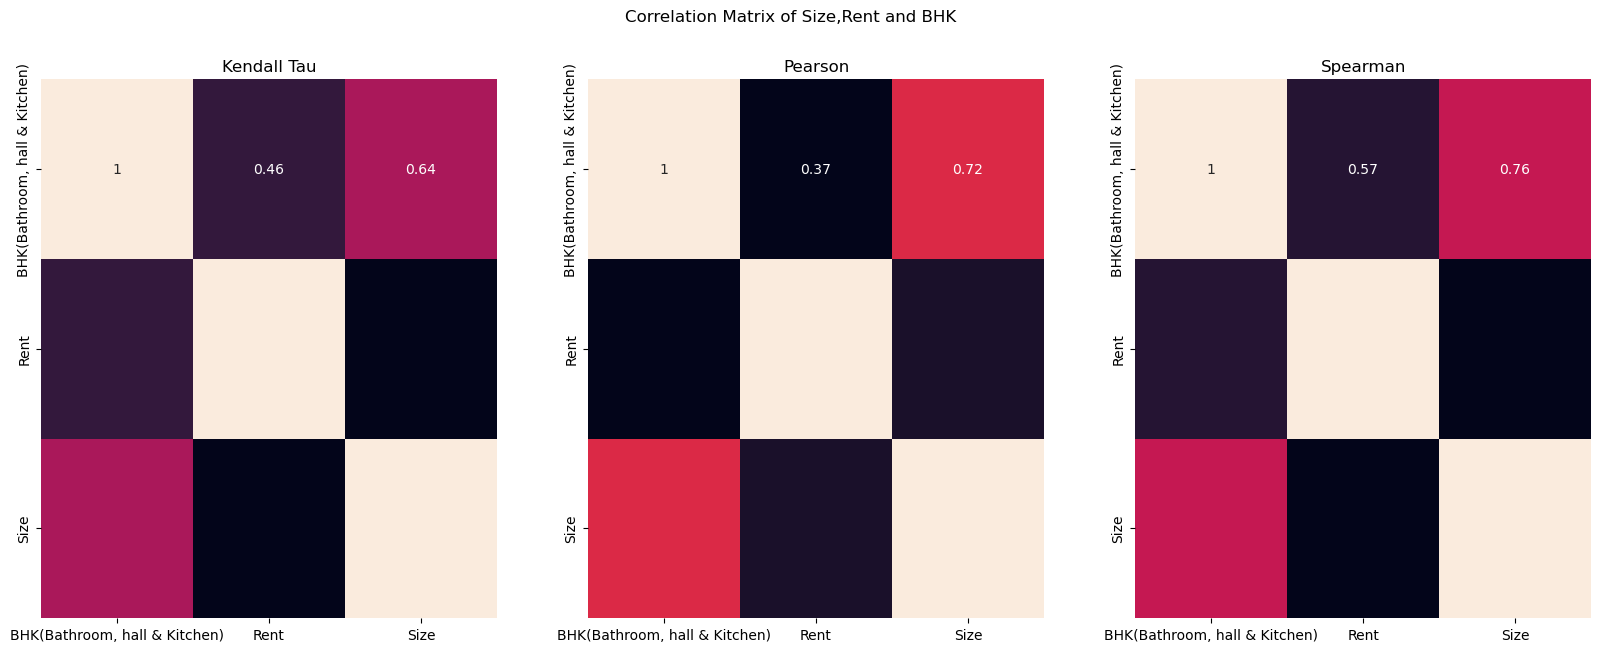

In [8]:
fig,axes=plt.subplots(1,3,figsize=(20,7))

sns.heatmap(Kendall_corr,ax=axes[0],annot=True,cbar=False)
sns.heatmap(Pearson_corr,ax=axes[1],annot=True,cbar=False)
sns.heatmap(Spearman_corr,ax=axes[2],annot=True,cbar=False)

plt.suptitle('Correlation Matrix of Size,Rent and BHK')

axes[0].set_title('Kendall Tau')
axes[1].set_title('Pearson')
axes[2].set_title('Spearman')


In [9]:
# 2.) t-test/Hypothesis Testing-checks normalcy between quantities
p_value=0.05

H0='Null Hypothesis, data is normal, p_value>0.05'
H1='Alternative Hypothesis, data is not normal, p_value<0.05'

stats,p_value=shapiro(House_Rent['BHK(Bathroom, hall & Kitchen)'].values)

if p_value<0.05:
    print(f'{H1} in BHK')
else:
    print(f'{H0} in BHK')

p_value

Alternative Hypothesis, data is not normal, p_value<0.05 in BHK


0.0

In [10]:
H0='Null Hypothesis, theere is no significant difference'
H1='Alternative Hypothesis, there is significant difference'

Furnished_Rent=House_Rent[House_Rent['Furnishing Status']=='Furnished']['Rent']
Unfurnished_Rent=House_Rent[House_Rent['Furnishing Status']=='Unfurnished']['Rent']
t_stat,p_value=ttest_ind(Furnished_Rent,Unfurnished_Rent,equal_var=False)

print("T-Statistic: ",t_stat)
print("P-Value: ",p_value)

if p_value<0.05:
    print(f'{H1} between the rent of the furnished and unfurnished apartments')
else:
    print(f'{H0} between the rent of the furnished and unfurnished apartments')

T-Statistic:  10.524296906037602
P-Value:  2.654291192400322e-24
Alternative Hypothesis, there is significant difference between the rent of the furnished and unfurnished apartments


In [11]:
# Write a code that compares the average rent with the super area and built area. Know if there is a difference between the two areas or not.

H0='Null Hypothesis, there is no significant difference'
H1='Alternative Hypothesis, there is significant difference'

Super_Rent=House_Rent[House_Rent['Area Type']=='Super Area']['Rent']
Built_Rent=House_Rent[House_Rent['Area Type']=='Built Area']['Rent']
t_stat,p_value=ttest_ind(Super_Rent,Built_Rent,equal_var=False)

print("T-Statistic: ",t_stat)
print("P-Value: ",p_value)

if p_value<0.05:
    print(f'{H1} in rent between a super area and a built area')
else:
    print(f'{H0} in rent between a super area and a built area')

T-Statistic:  1.8054609616717665
P-Value:  0.31744159203891564
Null Hypothesis, there is no significant difference in rent between a super area and a built area


In [12]:
# Write a code that compares the average rent with the super area and carpet area. Know if there is a difference between the two areas or not.

H0='Null Hypothesis, there is no significant difference'
H1='Alternative Hypothesis, there is significant difference'

Super_Rent=House_Rent[House_Rent['Area Type']=='Super Area']['Rent']
Carpet_Rent=House_Rent[House_Rent['Area Type']=='Carpet Area']['Rent']
t_stat,p_value=ttest_ind(Super_Rent,Carpet_Rent,equal_var=False)

print("T-Statistic: ",t_stat)
print("P-Value: ",p_value)

if p_value<0.05:
    print(f'{H1} in rent between a super area and a carpet area')
else:
    print(f'{H0} in rent between a super area and a carpet area')

T-Statistic:  -14.791287090698571
P-Value:  1.5356186843427016e-47
Alternative Hypothesis, there is significant difference in rent between a super area and a carpet area


In [13]:
# Write a code that compares the average rent with the carpet area and built area. Know if there is a difference between the two areas or not.

H0='Null Hypothesis, there is no significant difference'
H1='Alternative Hypothesis, there is significant difference'

Carpet_Rent=House_Rent[House_Rent['Area Type']=='Carpet Area']['Rent']
Built_Rent=House_Rent[House_Rent['Area Type']=='Built Area']['Rent']
t_stat,p_value=ttest_ind(Carpet_Rent,Built_Rent,equal_var=False)

print("T-Statistic: ",t_stat)
print("P-Value: ",p_value)

if p_value<0.05:
    print(f'{H1} in rent between a built area and a carpet area')
else:
    print(f'{H0} in rent between a built area and a carpet area')

T-Statistic:  8.349230119051098
P-Value:  0.028475844409037353
Alternative Hypothesis, there is significant difference in rent between a built area and a carpet area


# ANOVA-Analysis of Variance

In [14]:
# ANOVA helps with mean of three or more groups
House_Rent['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [15]:
H0='Null Hypothesis, there is no significant difference'
H1='Alternative Hypothesis, there is significant difference'

stats,p_value=f_oneway(
    House_Rent[House_Rent['City']=='Kolkata']['Rent'].values,
    House_Rent[House_Rent['City']=='Mumbai']['Rent'].values,
    House_Rent[House_Rent['City']=='Bangalore']['Rent'].values,
    House_Rent[House_Rent['City']=='Delhi']['Rent'].values,
    House_Rent[House_Rent['City']=='Chennai']['Rent'].values,
    House_Rent[House_Rent['City']=='Hyderabad']['Rent'].values,
)

print(f'stats:{stats} \np_value:{p_value}')

if p_value<0.05:
    print(f'{H1} between the rent of the cities')

else:
    print(f'{H0} between the rent of the cities')
    

stats:117.50581101257114 
p_value:1.7334420745338585e-117
Alternative Hypothesis, there is significant difference between the rent of the cities


In [16]:
House_Rent['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [17]:
# Using one way anova, check if there is significant differences in the rent of the different area type

H0='Null Hypothesis, there is no significant difference'
H1='Alternative Hypothesis, there is significant difference'

stats,p_value=f_oneway(
    House_Rent[House_Rent['Area Type']=='Super Area']['Rent'].values,
    House_Rent[House_Rent['Area Type']=='Carpet Area']['Rent'].values,
    House_Rent[House_Rent['Area Type']=='Built Area']['Rent'].values
)

print(f'stats:{stats} \np_value:{p_value}')

if p_value<0.05:
    print(f'{H1} between the rent of the areas')

else:
    print(f'{H0} between the rent of the areas')

stats:115.83480180772216 
p_value:7.665810316509855e-50
Alternative Hypothesis, there is significant difference between the rent of the areas


In [18]:
City_Rent=[House_Rent[House_Rent['City']==city]['Rent'] for city in House_Rent['City'].unique()]

anova_stat,anova_p=f_oneway(*City_Rent)

print(f'F-Statistic: ', anova_stat)
print(f'P_Value: ', anova_p)

if p_value<0.05:
    print(f'{H1} between the rent of the cities')

else:
    print(f'{H0} between the rent of the cities')

F-Statistic:  117.50581101257114
P_Value:  1.7334420745338585e-117
Alternative Hypothesis, there is significant difference between the rent of the cities


In [19]:
House_Rent['Point of Contact'].unique()

array(['Contact Owner', 'Contact Agent', 'Contact Builder'], dtype=object)

In [20]:
# Using one way anova, chack if there are differences in the rent based on the point of contact
PoC_Rent=[House_Rent[House_Rent['Point of Contact']==PoC]['Rent'] for PoC in House_Rent['Point of Contact'].unique()]

anova_stat,anova_p=f_oneway(*PoC_Rent)

print(f'F-Statistic: ', anova_stat)
print(f'P_Value: ', anova_p)

if p_value<0.05:
    print(f'{H1} in the rent based on the point of contact')

else:
    print(f'{H0} in the rent based on thhe point of contact')

F-Statistic:  309.09604523505004
P_Value:  6.651444070417695e-127
Alternative Hypothesis, there is significant difference in the rent based on the point of contact


# Chi Square Test

In [21]:
House_Rent['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [22]:
House_Rent['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [26]:
H0='Null Hypothesis, there is no significant difference'
H1='Alternative Hypothesis, there is significant difference'

Contingency_table=pd.crosstab(House_Rent['Tenant Preferred'],House_Rent['Furnishing Status'])

chi2,p_value,dof,expected=chi2_contingency(Contingency_table)

print('Chi-Square Statistics: ',chi2)
print('P_Value: ',p_value)
print('Degree of Freedom: ',dof)
print('Expected Frequencies: ',expected)

if p_value<0.05:
    print(f'{H1}')
else:
    print(f'{H0}')

Chi-Square Statistics:  57.77795830080092
P_Value:  8.495459019058646e-12
Degree of Freedom:  4
Expected Frequencies:  [[ 118.67144665  393.8211725   317.50738085]
 [ 491.98608182 1632.69717419 1316.31674399]
 [  67.34247153  223.48165331  180.17587516]]
Alternative Hypothesis, there is significant difference
